## Sentiment Analysis with TF‑IDF and Linear SVM

To improve upon the bag‑of‑words model, we apply **TF‑IDF** (Term Frequency–Inverse Document Frequency) weighting and train a linear Support Vector Machine (SVM).  TF‑IDF emphasises words that are frequent in a document but rare across the corpus.  The SVM is robust to high‑dimensional sparse data and often performs well for text classification tasks.


Accuracy: 0.500

Classification Report:
              precision    recall  f1-score   support

    negative       0.50      0.33      0.40         3
    positive       0.50      0.67      0.57         3

    accuracy                           0.50         6
   macro avg       0.50      0.50      0.49         6
weighted avg       0.50      0.50      0.49         6



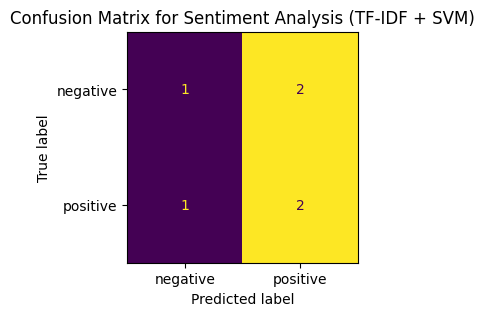

Top n-grams contributing to positive sentiment:
meal: 0.29
excellent: 0.29
meal excellent: 0.29
excellent customer: 0.29
delicious: 0.29
delicious meal: 0.29
superb quality: 0.27
design superb: 0.27
design: 0.27
beautiful design: 0.27

Top n-grams contributing to negative sentiment:
worst purchase: -0.30
worst: -0.30
purchase ve: -0.30
purchase: -0.30
ve: -0.30
disappointed: -0.30
didn: -0.30
disappointed didn: -0.30
work: -0.30
didn work: -0.30


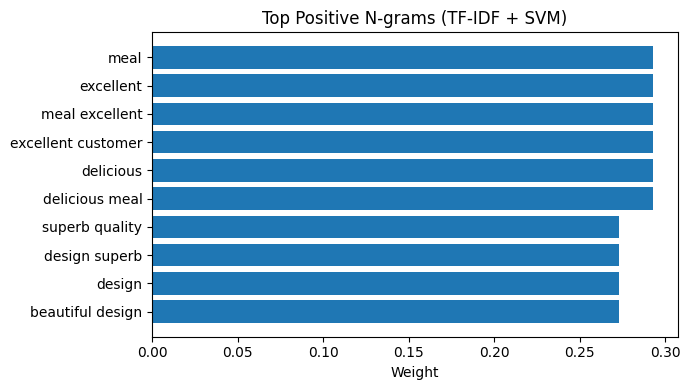

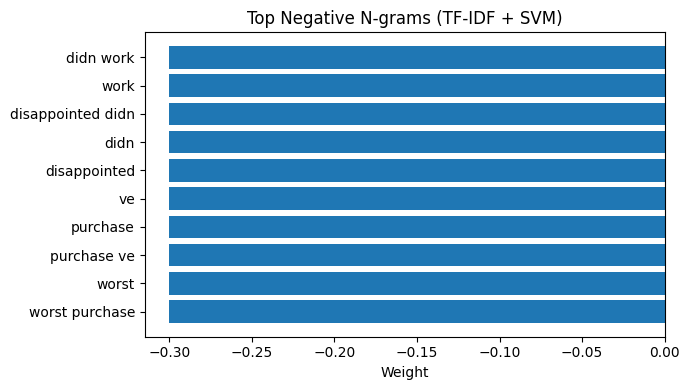

In [1]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

%matplotlib inline

# Use the same custom dataset from the previous notebook
positive_sentences = [
    "I absolutely loved this product, it worked wonders!",
    "What a fantastic experience, highly recommend!",
    "I'm extremely satisfied with the service provided.",
    "The movie was wonderful and truly enjoyable.",
    "Great value for money, I will definitely buy again.",
    "The support team was friendly and resolved my issue.",
    "An outstanding performance that exceeded my expectations.",
    "Delicious meal and excellent customer service.",
    "Beautiful design and superb quality.",
    "The trip was amazing, we had a great time!"
]

negative_sentences = [
    "This was the worst purchase I've ever made.",
    "I am very disappointed, it didn't work at all.",
    "The service was terrible and the staff were rude.",
    "What a waste of money, completely useless.",
    "I hated the movie, it was boring and too long.",
    "Not worth the price, extremely poor quality.",
    "I had an awful experience, never coming back.",
    "The food was bad and the wait time was ridiculous.",
    "Broken on arrival and customer service was no help.",
    "This product is awful, I want a refund."
]

texts = positive_sentences + negative_sentences
labels = [1] * len(positive_sentences) + [0] * len(negative_sentences)

df = pd.DataFrame({'text': texts, 'label': labels})

# Train/test split
X_train, X_test, y_train, y_test = train_test_split(df['text'], df['label'], test_size=0.3, random_state=42, stratify=df['label'])

# TF-IDF vectorisation
vectorizer = TfidfVectorizer(stop_words='english', ngram_range=(1, 2))
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Train Linear SVM classifier
svm = LinearSVC()
svm.fit(X_train_tfidf, y_train)

# Predictions and evaluation
y_pred = svm.predict(X_test_tfidf)
acc = accuracy_score(y_test, y_pred)
print(f"Accuracy: {acc:.3f}")
print()  # Blank line before the classification report
print('Classification Report:')
print(classification_report(y_test, y_pred, target_names=['negative','positive']))

# Confusion matrix
fig, ax = plt.subplots(figsize=(4, 3))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['negative','positive'], ax=ax, colorbar=False)
plt.title('Confusion Matrix for Sentiment Analysis (TF-IDF + SVM)')
plt.show()

# Inspect top n-grams by weight (coefficients)
coefs = svm.coef_[0]
feature_names = vectorizer.get_feature_names_out()

top_pos_indices = np.argsort(coefs)[-10:]
top_neg_indices = np.argsort(coefs)[:10]

top_pos = [(feature_names[i], coefs[i]) for i in top_pos_indices]
top_neg = [(feature_names[i], coefs[i]) for i in top_neg_indices]

print('Top n-grams contributing to positive sentiment:')
for phrase, weight in reversed(top_pos):
    print(f"{phrase}: {weight:.2f}")

print()  # Blank line before negative n-grams
print('Top n-grams contributing to negative sentiment:')
for phrase, weight in top_neg:
    print(f"{phrase}: {weight:.2f}")

# Plot top n-grams
def plot_ngrams(ngrams, title):
    words, weights = zip(*ngrams)
    plt.figure(figsize=(7, 4))
    positions = np.arange(len(words))
    plt.barh(positions, weights, align='center')
    plt.yticks(positions, words)
    plt.xlabel('Weight')
    plt.title(title)
    plt.tight_layout()
    plt.show()

plot_ngrams(top_pos, 'Top Positive N-grams (TF-IDF + SVM)')
plot_ngrams(top_neg, 'Top Negative N-grams (TF-IDF + SVM)')


### Interpretation

Using TF‑IDF and a linear SVM boosts performance by emphasising rare yet informative words and bi‑grams.  The top n‑grams show that phrases like *highly recommend* and *great time* strongly indicate positive sentiment, while *worst purchase* and *waste of money* point to negative sentiment.  Such granular insights can inform marketing campaigns, product design and customer engagement strategies.
